<a href="https://colab.research.google.com/github/Xfinity-bot/ML-Notebooks/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression**

In [ ]:
import numpy as np

In [ ]:
from IPython.lib.display import YouTubeVideo
X = 2*np.random.rand(100,1)
Y= 4 +3*X+np.random.randn(100,1)

In [ ]:
X_b = np.c_[np.ones((100,1)),X]

In [ ]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T)
theta_best

array([[-1.19992580e-03,  2.64064341e-02,  1.93736537e-02,
         2.79571808e-02,  3.60992390e-02, -1.16700776e-02,
         2.48847092e-02,  3.59278836e-03,  2.58472829e-02,
         3.29872386e-02,  2.74896203e-02,  2.16627568e-02,
         1.43706651e-02,  9.07176958e-03,  3.34210764e-02,
         3.22959202e-02,  3.43815613e-02, -9.85192855e-03,
        -5.24007983e-03, -1.48359765e-02,  2.17812006e-02,
        -8.27148783e-03, -6.00629684e-03,  9.16632176e-03,
        -1.60549770e-02, -1.26039390e-02, -1.13268361e-02,
        -5.26380739e-03,  1.12743577e-02,  1.70393433e-02,
         4.71078287e-03, -1.80254615e-02,  1.51436232e-02,
         1.37055149e-03,  3.24146959e-02, -4.26274211e-03,
        -1.48563749e-02,  9.95859730e-03,  1.28312421e-04,
         3.28410153e-02,  2.03863114e-02,  1.47849691e-02,
         2.02358704e-02,  1.74106813e-02,  1.11244422e-03,
         1.41778722e-02, -1.55113826e-02, -1.56939146e-02,
         8.88917720e-03, -1.72746858e-03, -1.52778313e-0

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[-0.00119993,  0.02640643,  0.01937365,  0.02795718,  0.03609924,
        -0.01167008,  0.02488471,  0.00359279,  0.02584728,  0.03298724,
         0.02748962,  0.02166276,  0.01437067,  0.00907177,  0.03342108,
         0.03229592,  0.03438156, -0.00985193, -0.00524008, -0.01483598,
         0.0217812 , -0.00827149, -0.0060063 ,  0.00916632, -0.01605498,
        -0.01260394, -0.01132684, -0.00526381,  0.01127436,  0.01703934,
         0.00471078, -0.01802546,  0.01514362,  0.00137055,  0.0324147 ,
        -0.00426274, -0.01485637,  0.0099586 ,  0.00012831,  0.03284102,
         0.02038631,  0.01478497,  0.02023587,  0.01741068,  0.00111244,
         0.01417787, -0.01551138, -0.01569391,  0.00888918, -0.00172747,
        -0.01527783, -0.00601752, -0.0016424 , -0.00184565, -0.01289356,
         0.02712582,  0.00466373,  0.00903641,  0.01579457,  0.01876064,
        -0.00809877, -0.01735331, -0.01826107,  0.01062166,  0.00317976,
         0.01826194,  0.01315834,  0.03082049,  0.0

NameError: ignored

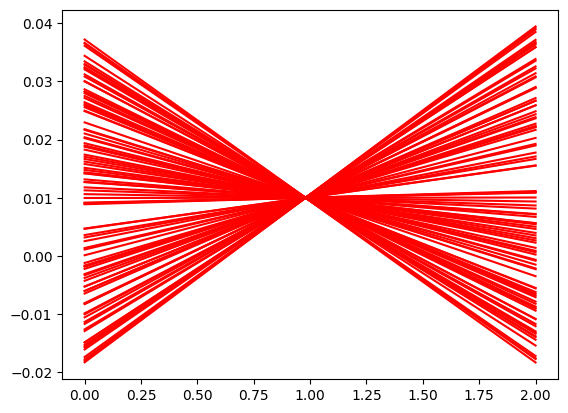

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

# **SKLEARN**

In [ ]:

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

In [ ]:
lin_reg.predict(X_new)

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

# **GRADIENT DESCENT**

In [ ]:
np.linalg.pinv(X_b).dot(y)

In [ ]:
eta = 0.1
n_iterations = 1000
m = 100


theta = np.random.randn(2,1)
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients
  X_new = np.array([[0],[2]])
  X_new_b = np.c_[np.ones((2,1)),X_new]
  y_predict = X_new_b.dot(theta)
  plt.plot(X_new,y_predict,"r-")
  plt.plot(X,y,"b.")
  plt.axis([0,2,0,15])
plt.show()

In [ ]:
n_epochs =50
t0,t1 = 5,50

def learning_schedule(t):
  return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gardients = 2 * xi.T.dot(xi.dot(theta)-yi)
    eta=learning_schedule(epoch*m+i)
    theta = theta - eta * gradients
    X_new = np.array([[0],[2]])
    X_new_b = np.c_[np.ones((2,1)),X_new]
    y_predict = X_new_b.dot(theta)
    plt.plot(X_new,y_predict,"r-")
    plt.plot(X,y,"b.")
    plt.axis([0,2,0,15])
plt.show()

In [ ]:
m = 100
X = 6 * np.random.rand(m,1)-3
y = 0.5 *X**2 + X + 2 +np.random.randn(m,1)
 plt.plot(X,y,"b.")